# EN3160 Assignment 3 on Neural Networks

### Link to the repository : https://github.com/neocodered/EN3160_Assignment_3-Neural_Networks.git

## 1. Question 1 - Modifying a given Network

Files already downloaded and verified
Files already downloaded and verified
Epoch 1 / 10, Loss: 2.3004672825336456
Epoch 2 / 10, Loss: 2.2926107325553895
Epoch 3 / 10, Loss: 2.2820791158676146
Epoch 4 / 10, Loss: 2.26763499212265
Epoch 5 / 10, Loss: 2.250334560394287
Epoch 6 / 10, Loss: 2.2320537254810335
Epoch 7 / 10, Loss: 2.2145901038646696
Epoch 8 / 10, Loss: 2.1989730768203737
Epoch 9 / 10, Loss: 2.1853913459777834
Epoch 10 / 10, Loss: 2.1737204563617705


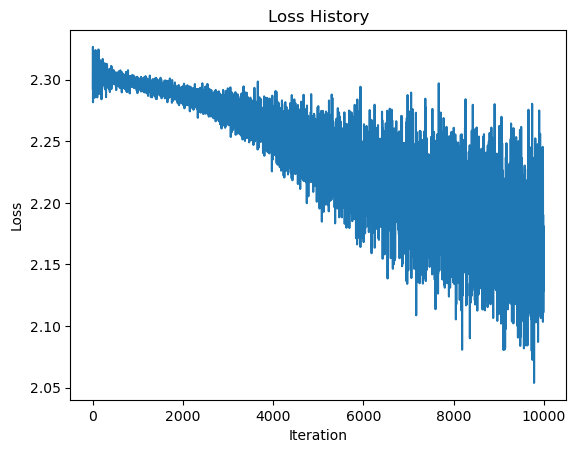

Training accuracy: 23.47%
Test accuracy: 23.65%


In [4]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 50

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define Network Parameters with an added hidden layer
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
H = 100            # Hidden layer size
K = 10             # Output size (number of classes in CIFAR-10)

# Initialize weights and biases for the two-layer model
w1 = torch.randn(Din, H) * 0.01  # Weights from input to hidden layer
b1 = torch.zeros(H)              # Biases for hidden layer
w2 = torch.randn(H, K) * 0.01    # Weights from hidden to output layer
b2 = torch.zeros(K)              # Biases for output layer

# Hyperparameters
epochs = 10  # Number of epochs to train
lr = 1e-3    # Learning rate
lr_decay = 0.9  # Learning rate decay
loss_history = []

# 3. Training Loop with Manual Gradient Calculation for Cross-Entropy Loss
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)

        # Forward pass through the hidden layer with sigmoid activation
        hidden = x_train.mm(w1) + b1  # Linear transformation to hidden layer
        hidden = torch.sigmoid(hidden)  # Sigmoid activation

        # Forward pass through the output layer
        y_pred = hidden.mm(w2) + b2  # Linear transformation to output layer

        # Cross-Entropy Loss calculation (without backward() call)
        loss_fn = nn.CrossEntropyLoss()
        loss = loss_fn(y_pred, labels)
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Manually calculate the gradients for the output layer
        # Convert labels to one-hot encoding to calculate gradients
        y_true = nn.functional.one_hot(labels, K).float()

        # Gradient of Cross-Entropy Loss w.r.t. output layer inputs (logits)
        softmax = torch.exp(y_pred) / torch.exp(y_pred).sum(dim=1, keepdim=True)
        dy_pred = (softmax - y_true) / Ntr

        # Gradients for weights and biases of the output layer
        dw2 = hidden.t().mm(dy_pred)  # Gradient of loss w.r.t. w2
        db2 = dy_pred.sum(dim=0)      # Gradient of loss w.r.t. b2

        # Backpropagate to hidden layer
        dhidden = dy_pred.mm(w2.t()) * hidden * (1 - hidden)  # Backprop through sigmoid

        # Gradients for weights and biases of the hidden layer
        dw1 = x_train.t().mm(dhidden)  # Gradient of loss w.r.t. w1
        db1 = dhidden.sum(dim=0)       # Gradient of loss w.r.t. b1

        # Parameter update with manually calculated gradients
        w1 -= lr * dw1
        b1 -= lr * db1
        w2 -= lr * dw2
        b2 -= lr * db2

    # Print loss for every epoch
    print(f"Epoch {epoch + 1} / {epochs}, Loss: {running_loss / len(trainloader)}")

    # Learning rate decay
    lr *= lr_decay

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)

        # Forward pass through the hidden layer and output layer
        hidden = torch.sigmoid(x_train.mm(w1) + b1)
        y_train_pred = hidden.mm(w2) + b2
        predicted_train = torch.argmax(y_train_pred, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)

        # Forward pass through the hidden layer and output layer
        hidden = torch.sigmoid(x_test.mm(w1) + b1)
        y_test_pred = hidden.mm(w2) + b2
        predicted_test = torch.argmax(y_test_pred, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


## 2. Question 2 - LeNet 5 Network on MNIST

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



102.8%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



112.7%


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Epoch 1/10, Loss: 0.2683
Epoch 2/10, Loss: 0.0730
Epoch 3/10, Loss: 0.0528
Epoch 4/10, Loss: 0.0392
Epoch 5/10, Loss: 0.0334
Epoch 6/10, Loss: 0.0282
Epoch 7/10, Loss: 0.0241
Epoch 8/10, Loss: 0.0191
Epoch 9/10, Loss: 0.0176
Epoch 10/10, Loss: 0.0140


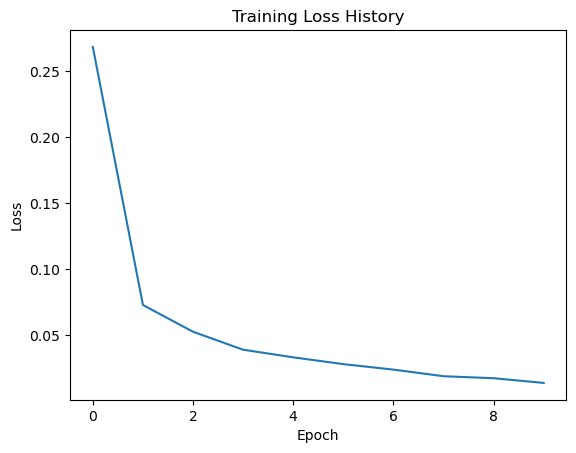

Training Accuracy: 99.63%
Test Accuracy: 98.95%


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Define LeNet-5 Model
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)  # Conv layer 1
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)            # Conv layer 2
        self.fc1 = nn.Linear(16 * 5 * 5, 120)                             # Fully connected layer 1
        self.fc2 = nn.Linear(120, 84)                                     # Fully connected layer 2
        self.fc3 = nn.Linear(84, 10)                                      # Fully connected layer 3 (output layer)

    def forward(self, x):
        x = torch.relu(self.conv1(x))          # Conv1 + ReLU
        x = nn.functional.max_pool2d(x, 2)     # Max Pooling
        x = torch.relu(self.conv2(x))          # Conv2 + ReLU
        x = nn.functional.max_pool2d(x, 2)     # Max Pooling
        x = x.view(-1, 16 * 5 * 5)             # Flatten
        x = torch.relu(self.fc1(x))            # FC1 + ReLU
        x = torch.relu(self.fc2(x))            # FC2 + ReLU
        x = self.fc3(x)                        # FC3 (Output layer)
        return x

# 2. Load MNIST Data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

batch_size = 64

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

# 3. Initialize Model, Loss Function, and Optimizer
model = LeNet5()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. Training the Model
epochs = 10
loss_history = []

for epoch in range(epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        optimizer.zero_grad()              # Zero the parameter gradients
        outputs = model(inputs)            # Forward pass
        loss = criterion(outputs, labels)  # Calculate loss
        loss.backward()                    # Backward pass
        optimizer.step()                   # Optimize
        
        running_loss += loss.item()
        
    avg_loss = running_loss / len(trainloader)
    loss_history.append(avg_loss)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}")

# Plot Loss History
plt.plot(loss_history)
plt.title("Training Loss History")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Training and Test Accuracy
def calculate_accuracy(loader, model):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

train_accuracy = calculate_accuracy(trainloader, model)
test_accuracy = calculate_accuracy(testloader, model)

print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

## 3. Question 3 - Transfer Learning

In [28]:
# License: BSD
# Author: Sasank Chilamkurthy

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

cudnn.benchmark = True
plt.ion()   # interactive mode

In [29]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'data/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

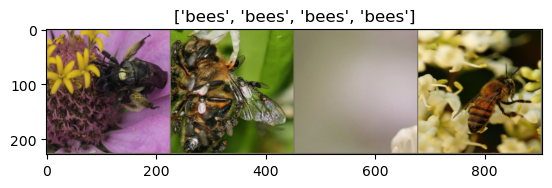

In [30]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [32]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    # Create a temporary directory to save training checkpoints
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')

        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0

        for epoch in range(num_epochs):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)
                if phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                # deep copy the model
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_params_path)

            print()

        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:4f}')

        # load best model weights
        # Load best model weights
        model.load_state_dict(torch.load(best_model_params_path))

    return model

In [33]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [34]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to ``nn.Linear(num_ftrs, len(class_names))``.
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

Epoch 0/24
----------
train Loss: 0.8057 Acc: 0.6475
val Loss: 0.1744 Acc: 0.9608

Epoch 1/24
----------
train Loss: 0.4127 Acc: 0.7910
val Loss: 0.1528 Acc: 0.9542

Epoch 2/24
----------
train Loss: 0.5198 Acc: 0.7828
val Loss: 0.2661 Acc: 0.8889

Epoch 3/24
----------
train Loss: 0.8199 Acc: 0.7500
val Loss: 0.9029 Acc: 0.7778

Epoch 4/24
----------
train Loss: 0.6768 Acc: 0.7869
val Loss: 0.2604 Acc: 0.9150

Epoch 5/24
----------
train Loss: 0.4550 Acc: 0.8156
val Loss: 0.3494 Acc: 0.8824

Epoch 6/24
----------
train Loss: 0.5729 Acc: 0.7746
val Loss: 0.2516 Acc: 0.9085

Epoch 7/24
----------
train Loss: 0.2904 Acc: 0.8770
val Loss: 0.2570 Acc: 0.9150

Epoch 8/24
----------
train Loss: 0.3567 Acc: 0.8484
val Loss: 0.2525 Acc: 0.9281

Epoch 9/24
----------
train Loss: 0.2768 Acc: 0.8852
val Loss: 0.2373 Acc: 0.9281

Epoch 10/24
----------
train Loss: 0.3061 Acc: 0.8852
val Loss: 0.2174 Acc: 0.9346

Epoch 11/24
----------
train Loss: 0.3292 Acc: 0.8607
val Loss: 0.2174 Acc: 0.9346

Ep

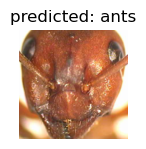

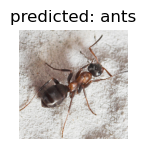

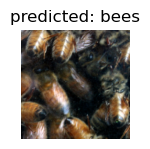

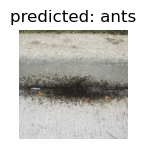

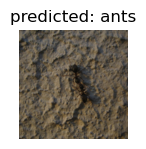

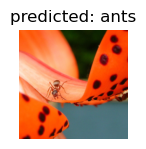

In [35]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

visualize_model(model_ft)

In [36]:
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

Epoch 0/24
----------
train Loss: 0.7152 Acc: 0.5902
val Loss: 0.2211 Acc: 0.9346

Epoch 1/24
----------
train Loss: 0.5372 Acc: 0.7582
val Loss: 0.2728 Acc: 0.8954

Epoch 2/24
----------
train Loss: 0.5380 Acc: 0.7951
val Loss: 0.2165 Acc: 0.9085

Epoch 3/24
----------
train Loss: 0.3681 Acc: 0.8525
val Loss: 0.1693 Acc: 0.9477

Epoch 4/24
----------
train Loss: 0.5397 Acc: 0.7582
val Loss: 0.5000 Acc: 0.8105

Epoch 5/24
----------
train Loss: 0.7397 Acc: 0.7418
val Loss: 0.3351 Acc: 0.8824

Epoch 6/24
----------
train Loss: 0.4123 Acc: 0.8566
val Loss: 0.1959 Acc: 0.9542

Epoch 7/24
----------
train Loss: 0.3764 Acc: 0.8484
val Loss: 0.2064 Acc: 0.9346

Epoch 8/24
----------
train Loss: 0.4313 Acc: 0.8361
val Loss: 0.1902 Acc: 0.9477

Epoch 9/24
----------
train Loss: 0.4196 Acc: 0.8115
val Loss: 0.1916 Acc: 0.9542

Epoch 10/24
----------
train Loss: 0.3087 Acc: 0.8811
val Loss: 0.2120 Acc: 0.9281

Epoch 11/24
----------
train Loss: 0.3611 Acc: 0.8607
val Loss: 0.1990 Acc: 0.9412

Ep

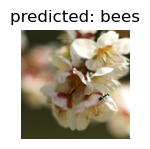

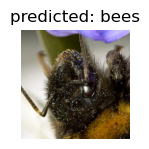

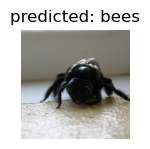

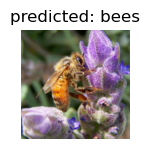

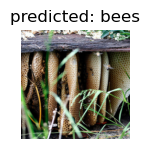

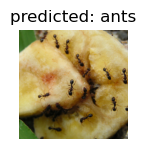

In [37]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

visualize_model(model_conv)

plt.ioff()
plt.show()